In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("Bank Customer Churn Prediction.csv")



In [3]:
df.shape

(10000, 12)

# Label Encoding

In [4]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [5]:
df['gender'] = le.fit_transform(df['gender'])
df['country'] = le.fit_transform(df['country'])

In [6]:
 df.head(3)

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,0,0,42,8,159660.80,3,1,0,113931.57,1


In [7]:
 df.isnull().sum()

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

In [26]:
df.duplicated().sum()


0

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  int32  
 3   gender            10000 non-null  int32  
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int32(2), int64(8)
memory usage: 859.5 KB


In [28]:
df.describe()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,0.746300,0.545700,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,0.827529,0.497932,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,0.000000,0.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,0.000000,0.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,0.000000,1.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,1.000000,1.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,2.000000,1.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [30]:
corr = df.corr()


In [31]:
corr

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
customer_id,1.000000,0.005308,0.006516,-0.002641,0.009497,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248
credit_score,0.005308,1.000000,0.007888,-0.002857,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
country,0.006516,0.007888,1.000000,0.004719,0.022812,0.003739,0.069408,0.003972,-0.008523,0.006724,-0.001369,0.035943
gender,-0.002641,-0.002857,0.004719,1.000000,-0.027544,0.014733,0.012087,-0.021859,0.005766,0.022544,-0.008112,-0.106512
age,0.009497,-0.003965,0.022812,-0.027544,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
tenure,-0.014883,0.000842,0.003739,0.014733,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
balance,-0.012419,0.006268,0.069408,0.012087,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
products_number,0.016972,0.012238,0.003972,-0.021859,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
credit_card,-0.014025,-0.005458,-0.008523,0.005766,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
active_member,0.001665,0.025651,0.006724,0.022544,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128


In [32]:
import seaborn as sns
import matplotlib.pyplot as plt


<Axes: >

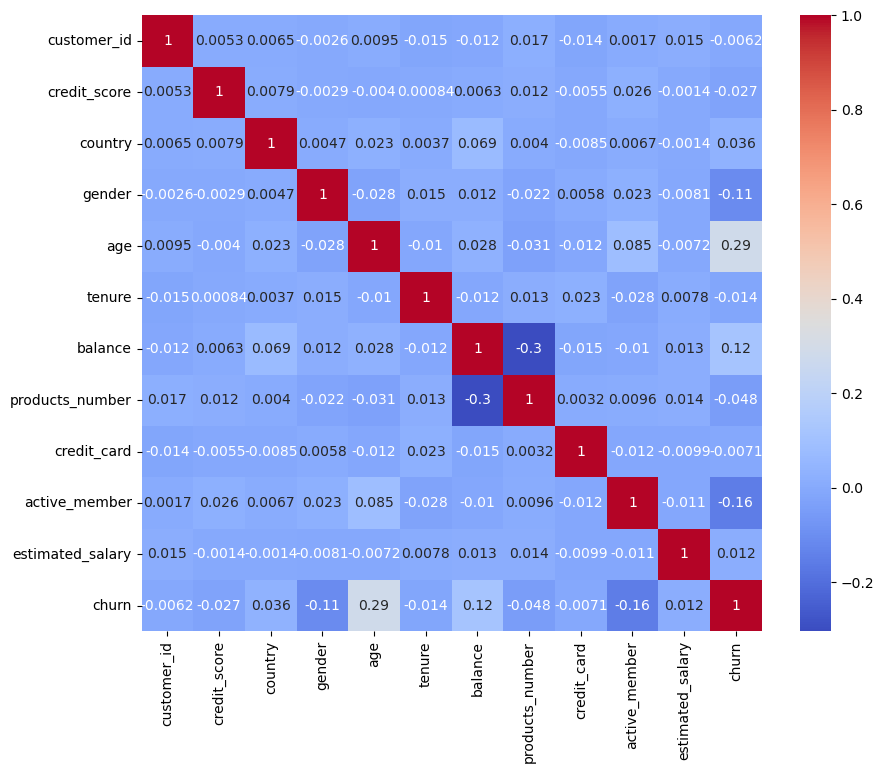

In [33]:

plt.figure(figsize=(10,8))
sns.heatmap(corr,annot=True,cbar=True,cmap='coolwarm')


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  int32  
 3   gender            10000 non-null  int32  
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int32(2), int64(8)
memory usage: 859.5 KB


<Axes: >

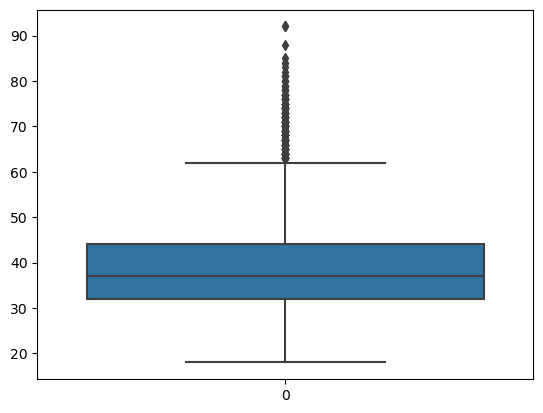

In [35]:
sns.boxplot(df['age'])

<Axes: xlabel='gender', ylabel='count'>

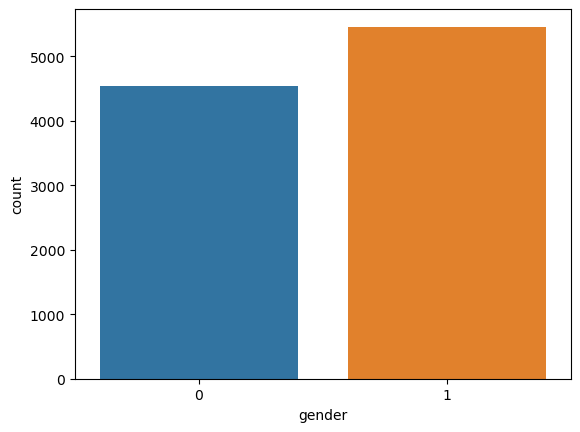

In [36]:
sns.countplot(x=df['gender'])

# Train Test Split

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
X = df.drop(['churn','customer_id'],axis=1)
y = df['churn']

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standrization

In [40]:
from sklearn.preprocessing import StandardScaler
sclr = StandardScaler()

In [41]:
X_train = sclr.fit_transform(X_train)
X_test = sclr.fit_transform(X_test)

# training model

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble  import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [43]:
models = {
    'lg':LogisticRegression(),
    'dtc':DecisionTreeClassifier(),
    'rfc':RandomForestClassifier(),
}

In [44]:
for name,model in models.items():
    model.fit(X_train,y_train)
    ypred = model.predict(X_test)
    print(f"{name} with accuracy : {accuracy_score(y_test,ypred)} ")

lg with accuracy : 0.8155 
dtc with accuracy : 0.785 
rfc with accuracy : 0.868 


# model selection

In [46]:
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)


RandomForestClassifier()

In [47]:
ypred = model.predict(X_test)

In [48]:
ypred

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

# prediction system


In [49]:
def prediction(credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary):
    features = np.array([[credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary]])
    features = sclr.fit_transform(features)
    prediction = rfc.predict(features).reshape(1,-1)
    return prediction[0]

# Example of Customer

In [51]:
credit_score = 608
country = 2
gender = 0
age= 41
tenure= 1
balance = 83807.86
products_number= 1
credit_card = 0
active_member =1
estimated_salary = 112542.58

In [52]:
pred  = prediction(credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary)

In [53]:
pred

array([0], dtype=int64)

In [54]:
if pred == 1:
    print("he left the compnay")
else:
    print("he is there still")


he is there still
